# About this notebook
In this notebook we briefly go through a demo of a boolean network simulator (BNS) written in python.
This simulator is based on the code in github : https://github.com/lujunyan1118/SimpleBool, while we made some adjustments and improvements for our needs. Our code is uploaded to https://github.com/yossidan/research_2021.

## Environment Setup
To run this notebook along with its python code, you will need to setup your local machine. 
We're using a Windows 10 machine, and tested with the following setups:<br>
1. install python 3 and pip (we use python 3.8.3): e.g. follow the steps in https://www.journaldev.com/30076/install-python-windows-10
2. install matplotlib : e.g. follow the steps in https://matplotlib.org/stable/users/installing.html
3. install windows terminal : e.g. from  https://sourceforge.net/projects/windows-terminal.mirror/
4. install jupyter notebook : e.g. follow https://jupyter.org/install
5. clone the code from https://github.com/yossidan/research_2021 and after cloning, open windows terminal at your local path **\research_2021\boolsim_notebook**, and run the notebook with :<br>
    + jupyter notebook <br>
    or on some setups you may need <br>
    + python -m notebook
    
## Simulator inputs 
To run a BNS simulation you first need to prepare an **ini file** (sim_1.ini in this demo), with all the parameters required to define the simulation.
The **ini file** holds information about the simulation for example: <br>
(1) path to boolean rules (.txt) file : a file that consists the boolean rules for the nodes/components in the simulation. In this demo its CAC.txt.<br>
(2) simulation type (mode) : e.g. sync / async. <br>
(3) path to the output folder : where outputs and plots will be saved. <br>
(4) some global definitions : such as list of 'always_on', 'always_off' nodes/components. <br>
<br>
In total - two input files are expected to be prepared as input of the simulation. <br>
1. an **ini file** - in this demo we're using the one in path **[work_root_folder]/_inputs/sim_1/sim_1.ini** <br>
2. a **rules.txt** - in this demo we're using the one in path **[work_root_folder]/_inputs/sim_1/CAC.txt** <br>
(and note that the ini_file holds a path to the rules_file, as will be shown below). <br>

**Notes:** <br>
1. The **[work_root_folder]** in the **ini file** tells the simulator to refer its working directory, which is **\boolsim_notebook\boolsim_simulator**. 

## Simulator outputs 
The simulator will give you the following outputs for each simulation: <br>
1. a 2D (grid-like) plot of nodes states (y-axis) over time steps (x-axis). <br>
2. the same information in a textual file. <br>

**Notes:** <br>
1. The simulator runs N rounds, each round with T steps, and then averages the node values in each step over all rounds. The number of rounds and steps are set in *num_rounds*, *num_steps* in the **ini_file**.
2. the outputs are saved for each simulation in a spearated folder, tagged with date and time at  **[work_root_folder]/_outputs/sim_outputs_[data_and_time]**).


## Example of our ini file (sim_1.ini)

As an example, let's look in the ini file for this demo with path at **[work_root_folder]/_inputs/sim_1/sim_1.ini**.<br>
<br>
<span style="color:blue">**rules_file_path = [work_root_folder]/_inputs/sim_1/CAC.txt**</span> <span style="color:green"> # path to the rules file. Starts with [work_root_folder]/. </span> <br>
<span style="color:blue">**sim_mode = SYNC**</span> <span style="color:green"># simulation mode : possible modes are SYNC, GASYNC, ROASYNC. </span><br>
<span style="color:blue">**always_on = DC**</span> <span style="color:green"># list of nodes that will be forced to ON at all steps (including at initial step)</span><br>
<span style="color:blue">**always_off =**</span> <span style="color:green"># list of nodes that will be forced to OFF at all steps (including at initial step)</span><br>
<span style="color:blue">**initially_on = APC, IKB**</span> <span style="color:green"># list of nodes that will be forced to ON at initial step </span><br>
<span style="color:blue">**initially_off =**</span> <span style="color:green"># list of nodes that will be forced to OFF at initial step</span><br>
<span style="color:blue">**init_if_missing = True**</span> <span style="color:green"># how you want to initialize nodes that don't included in always_xx and initially_xx lists.</span><br>    <span style="color:green"># possible values are : True, False, random.</span><br>
<span style="color:blue">**num_rounds = 500**</span> <span style="color:green"># number of rounds to be taken (all steps will be averaged over all rounds) </span> <br>
<span style="color:blue">**num_steps = 30**</span> <span style="color:green"># number of steps to be taken per each round <br>
<span style="color:blue">**plot_nodes = TNFA,TH2,TH1**</span>     <span style="color:green"># list of nodes for which you want to see a graph plot. (note that ANYWAY we prepare a<br> #   separated grid-like plot). </span> <br>
<span style="color:blue">**output_folder_base_path = [work_root_folder]/_outputs/**</span> <span style="color:green"> # path to the outputs folders. Starts with [work_root_folder]/. </span> <br>
<br>

**Notes:** <br>
1. You should leave the **[work_root_folder]** as-is in the **ini file**, don't change it. The **[work_root_folder]** tells the simulator to refer its working directory, which is **\boolsim_notebook\boolsim_simulator**. 
<br>
    
## Example of our rules file (CAC.txt)

As an example, let's look in the rules file for this demo with path at **./_inputs/sim_1/CAC.txt**.    
<span style="color:blue">    
ATM* = ROS <br>
ASK1* = ROS and not P21 <br>
AKT* = PI3K and not (PP2A or CASP3) <br>
BAX* = ((TBID or P53) and PP2A) and not AKT <br>
BCATENIN* = not (GSK3B and APC) <br>
BCL2* = (STAT3 or NFKB) and not (P53 or PP2A) <br>
CASP3* = (CASP8 or CASP9) and not IAP <br>
CASP8* = FADD and not (CFLIP or P21) <br>
CASP9* = CYTC and not (IAP or P21) <br>
CERAMIDE* = SMASE and not SPHK1 <br>
CFLIP* = NFKB <br>
COX2* = S1P and TNFR <br>
CYCLIND1* = (BCATENIN or STAT3 or JUN) and not GSK3B <br>
CYTC* = MOMP <br>
EP2* = PGE2 <br>
ERK* = MEK <br>
FAS* = CTL <br>
FADD* = TNFR or FAS <br>
FOS* = ERK <br>
GP130* = IL6 <br>
GSK3B* = not (EP2 or AKT) <br>
IAP* = (NFKB or STAT3) and not SMAC <br>
IKB* = not IKK <br>
IKK* = (AKT or (S1P and TNFR)) <br>
JAK* = GP130 and not SOCS <br>
JNK* = ASK1 or MEKK1 <br>
JUN* = ((BCATENIN or ERK) and JNK) and not GSK3B <br>
MDM2* = (P53 and AKT) and not (GSK3B or ATM) <br>
MEK* = RAF or ROS <br>
MEKK1* = CERAMIDE or TGFR or TNFR <br>
MOMP* = (BAX or TBID or CERAMIDE) and not BCL2 <br>
NFKB* = not IKB <br>
P21* = (P53 or SMAD) and not (GSK3B or CASP3) <br>
P53* = (PTEN or JNK or ATM) and not MDM2 <br>
PGE2* = COX2 <br>
PI3K* = (EP2 or RAS) and not PTEN <br>
PP2A* = CERAMIDE and not AKT <br>
PTEN* = P53 and not (NFKB or JUN) <br>
RAF* = CERAMIDE or RAS <br>
RAS* = EP2 or GP130 <br>
ROS* = TNFR and not SOD <br>
SOD* = NFKB or STAT3 <br>
S1P* = SPHK1 <br>
SMAC* = MOMP <br>
SMAD* = TGFR and not JUN <br>
SMAD7* = SMAD or NFKB <br>
SMASE* = P53 or FADD <br>
SPHK1* = ERK or TNFR <br>
STAT3* = JAK <br>
SOCS* = STAT3 <br>
TBID* = CASP8 and not BCL2 <br>
TGFR* = TGFB and not SMAD7 <br>
TNFR* = TNFA <br>
Proliferation* = (FOS and CYCLIND1) and not (P21 or CASP3) <br>
Apoptosis* = CASP3 <br>
TREG* = (IL10 or DC) and not IL6 <br>
TNFA* = MAC <br>
TH2* = IL4 and not (IFNG or TGFB) <br>
TH1* = (IL12 or IFNG) and not (IL10 or TGFB or IL4) <br>
TGFB* = TREG <br>
MAC* = (IFNG or CCL2) and not IL10 <br>
IL6* = MAC or DC or NFKB <br>
IL4* = DC or TH2 <br>
IL12* = DC or MAC <br>
IL10* = TREG or TH2 <br>
IFNG* = TH1 or CTL <br>
CTL* = IFNG and not TGFB <br>
DC* =  (CCL2 or TNFA) and not IL10 <br>
CCL2* = NFKB <br>   
</span>

## Let's execute our sample simulation

To run the simulator, we need to :  <br>

(1) open windows terminal in the correct folder which is **\bool_sim_notebook\boolean_net_simulator**.<br>

(2) in the teminal, run the notebook by : <br>

+ jupyter notebook <br>
or on some setups, you can try with: <br>
+ python -m notebook <br>

(3) set the 1 relative path in the python code below : <br>
+ path_to_sim_inifile - relative path to the ini file. <br>





----> initial working folder path is --> C:\YOSSID_WORKSPACE\__MY_STUDIES_2021\Projects_hillel\research_2021\boolsim_notebook.




----> Starting simulation...


----> current working folder path is --> C:\YOSSID_WORKSPACE\__MY_STUDIES_2021\Projects_hillel\research_2021\boolsim_notebook\boolsim_simulator.


----> Initializing a BooleanModel object.


BooleanModel initialization completed!                    
            Total nodes number:    70
            Simulation num_steps:    30
            Simulation num_rounds:    500
            Simulation mode:    Synchronous
            
----> Time simulation started...


----> Time simulation completed : please check your outputs at path : C:\YOSSID_WORKSPACE\__MY_STUDIES_2021\Projects_hillel\research_2021\boolsim_notebook\boolsim_simulator\_outputs\sim_outputs_2021_07_27__101221




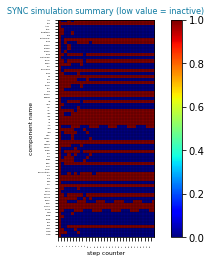

----> For better resolution of the grid plot : please open the .svg file at path : C:\YOSSID_WORKSPACE\__MY_STUDIES_2021\Projects_hillel\research_2021\boolsim_notebook\boolsim_simulator\_outputs\sim_outputs_2021_07_27__101221 and zoom-in.




In [1]:
import sys
import os

#
# You need to set this relative path correctly :
#
# (1) path_to_sim_inifile : relative path to the ini file for this simulation.
path_to_sim_inifile = "./_inputs/sim_1/sim_1.ini"

# change dir to the simulator folder.
current_folder = os.getcwd() 
print("\n\n----> initial working folder path is --> %s.\n\n" % current_folder)

path_to_simulator_root_folder = os.path.join(current_folder, 'boolsim_simulator')

os.chdir(path_to_simulator_root_folder)
current_folder = os.getcwd() 
# make sure we succeed to locate to the root folder.
assert current_folder == path_to_simulator_root_folder , "failed to locate to the root folder path. Please verify your path!"

print("\n\n----> Starting simulation...")
print("\n\n----> current working folder path is --> %s.\n\n" % current_folder)

# extend import paths and apply additional imports for the simulation
sys.path.append(os.path.join(os.getcwd(),'Source'))
from BooleanModel import BooleanModel
from Utilities import *

#
# And now run the simulation.
#
try:
    print("----> Initializing a BooleanModel object.\n\n")
    model = BooleanModel(path_to_sim_inifile)
except:
    print("---> Failed during model initialization - exiting!\n\n")
    sys.exit(-1)


sim_mode = model.get_sim_mode()

print("----> Time simulation started...\n\n")

final_results_all_steps = model.run_model_simulation()

outputs_path = model.get_outputs_path()

print("----> Time simulation completed : please check your outputs at path : %s\n\n" % outputs_path)

#
# final_results_all_steps = a "table of size N_NODES x N_STEPS.
#
# print(final_results_all_steps)

write_data(final_results_all_steps, outputs_path)

title_aux_str = sim_mode + ' '
my_grid_plot(final_results_all_steps, title_aux_str, 0.5, outputs_path)

# plot_result(final_results_all_steps, model.SIM_PARAMS['plot_nodes'], marker=False)

print("----> For better resolution of the grid plot : please open the .svg file at path : %s and zoom-in.\n\n" % outputs_path)
